In [95]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy.signal import convolve2d
import time
import cv2


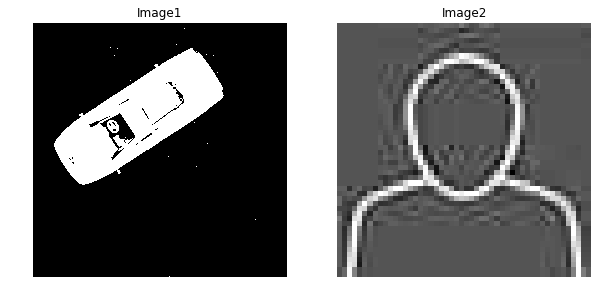

In [96]:
img1 = plt.imread('../input_data/ImageProcessingDemo.png')
img2 = plt.imread('../input_data/conv.jpg')
# print(img1.shape)

img1 = np.array(img1)
img2 = np.array(img2)

img1 = rgb2gray(img1)
img2 = plt.imread('../input_data/conv.jpg')
img2 = rgb2gray(img2)
img1 = np.round(img1)
img2 = np.round(img2)
# print(Check(img1, img2))
# (ans1,ans2) = Check(img1, img2)

figure = plt.figure(figsize=[10,10])
plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Image1'),plt.axis('off')
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Image2'),plt.axis('off')
plt.show()


In [97]:
def method1(img1, img2):
    size = tuple((img1.shape[0]+img2.shape[0]-1,img1.shape[0]+img2.shape[0]-1))
    start1 = time.time()
    img1_fft = np.fft.fftshift(np.fft.fft2(img1, size))
    img2_fft = np.fft.fftshift(np.fft.fft2(img2, size))
    ans1_fft = np.multiply(img1_fft, img2_fft)
    ans1 = np.fft.ifft2(np.fft.ifftshift(ans1_fft))
    ans1 = np.abs(ans1)
    end1 = time.time()
    magnitude_spectrum1 = (20*np.log(1+np.abs(ans1_fft)))
#     print(magnitude_spectrum1.shape)
    return (end1-start1),magnitude_spectrum1,ans1

In [98]:
def method2(img1, img2):
    start2 = time.time()
    ans2 = convolve2d(img1, img2)
#     ans2 = Convolve2d(img1, img2)
    ans2_fft = np.fft.fftshift(np.fft.fft2(ans2))
    end2 = time.time()
    magnitude_spectrum2 = (20*np.log(1+np.abs(ans2_fft)))
#     print(magnitude_spectrum2.shape)
    return (end2-start2),magnitude_spectrum2,ans2

0.10245251655578613   1.8697400093078613


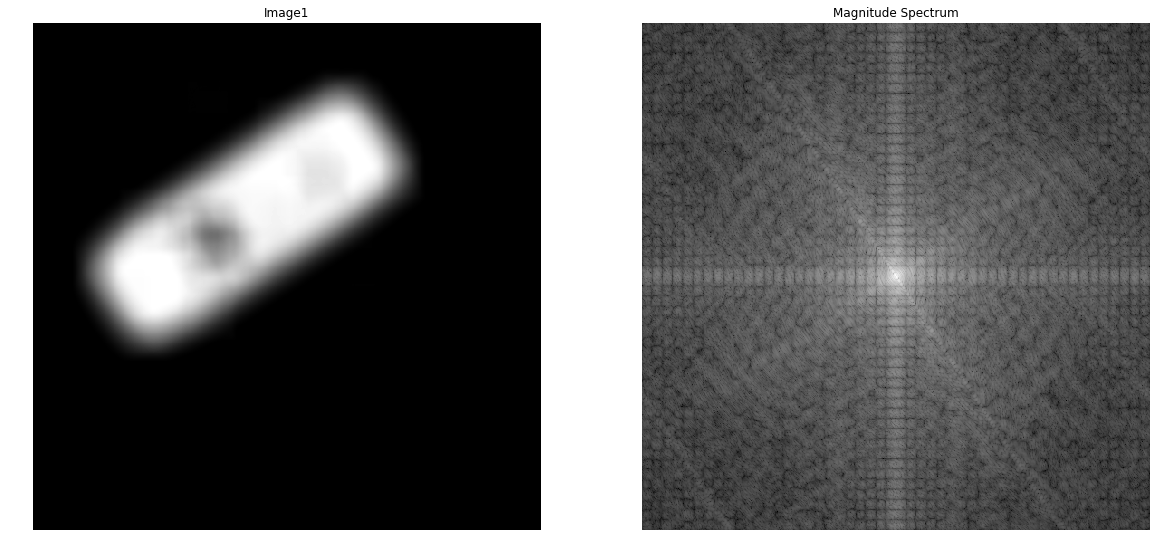

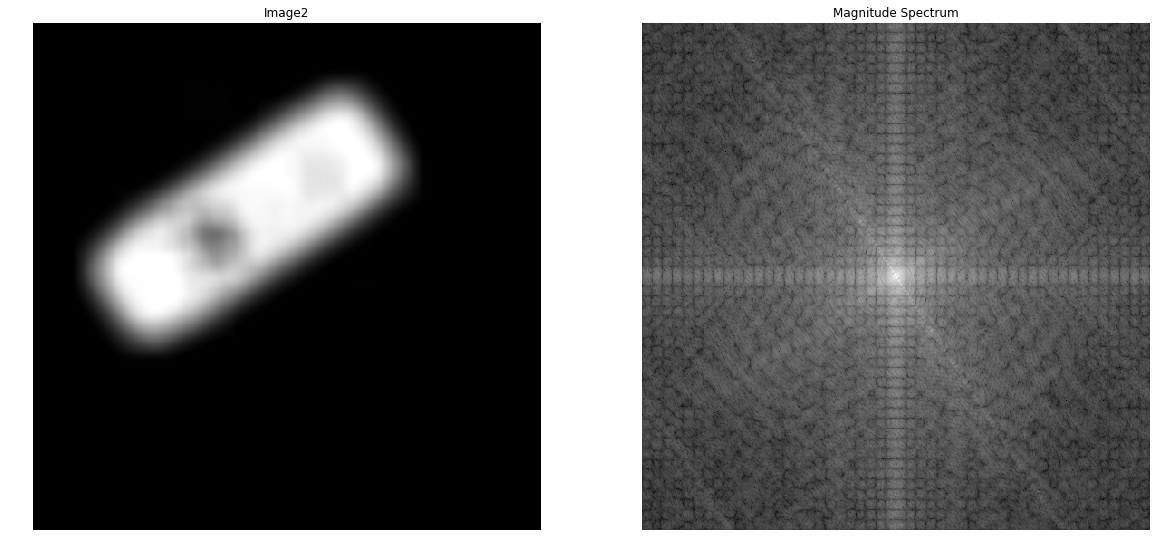

In [99]:
def plot(ans1, ans2, magnitude_spectrum1, magnitude_spectrum2):
    figure = plt.figure(figsize=[20,20])
    plt.subplot(121),plt.imshow(ans1, cmap = 'gray')
    plt.title('Image1'),plt.axis('off')
    plt.subplot(122),plt.imshow(magnitude_spectrum1, cmap = 'gray')
    plt.title('Magnitude Spectrum'),plt.axis('off')
    plt.show()

    figure = plt.figure(figsize=[20,20])
    plt.subplot(121),plt.imshow(ans2, cmap = 'gray')
    plt.title('Image2'),plt.axis('off')
    plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
    plt.title('Magnitude Spectrum'),plt.axis('off')
    plt.show()

def final_func(img1, img2, chk):
    time1,m1 ,ans1 = method1(img1, img2)
    time2,m2 ,ans2 = method2(img1, img2)

    print(time1," ",time2)
#     print("\n")
#     print(m1)
#     print("\n")
#     print(m2)
    if chk == 1:
        plot(ans1, ans2, m1, m2)
    
final_func(img1, img2, 1)

In [100]:
time1,m1 ,ans1 = method1(img1, img2)
time2,m2 ,ans2 = method2(img1, img2)
RMSE = np.sqrt(np.mean(np.square(m1-m2)))

print(RMSE)

2.504794708831471e-10


In [101]:
img22 = np.resize(img2, (40,50))
final_func(img1, img22, 0)

0.1095268726348877   1.5156276226043701


In [102]:
img22 = np.resize(img2, (30,40))
final_func(img1, img22, 0)

0.9134392738342285   1.0235462188720703


In [103]:
img22 = np.resize(img2, (20,30))
final_func(img1, img22, 0)

0.12436628341674805   0.5871443748474121


In [104]:
img22 = np.resize(img2, (25,25))
final_func(img1, img22, 0)

0.12284612655639648   0.4520680904388428


In [105]:
img22 = np.resize(img2, (20,25))
final_func(img1, img22, 0)

0.11417269706726074   0.36275434494018555


In [106]:
img22 = np.resize(img2, (10,20))
final_func(img1, img22, 0)

0.8077409267425537   0.3159306049346924


In [107]:
img22 = np.resize(img2, (5,5))
final_func(img1, img22, 0)

0.09487533569335938   0.0431520938873291


<b>We see that generally the time required to compute the time increases as the dimensions of the images increase.<br>The time taken to compute the DFT of both images with appropriate padding and then taking inverse FFT is less than that of taking the convulation of the images directly and also the complexity is less in the case of computing inverse transform O(n^2+nlog(n)) and O(n^4).</b>